In [1]:
import sys
import numpy as np
import pandas as pd
import scipy as sp
import sklearn
import mglearn
import matplotlib.pyplot as plt

# Neural Networks (Deep Learning)
- deep learning algoruthms are often tailored very carefully to a specific use case
- MLPs (Multilayer perceptrons / vanilla) are feed-forward neural networks

## The neural network model
- viewed as generalizations of linear models that perform multuple stages of processing to come to a decision
    - remember linear regressor: $ŷ = w[0] * x[0] + w[1] * x[1] + ... + w[p] * x[p] + b$

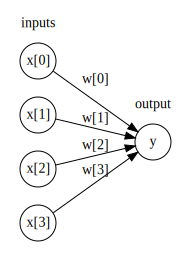

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

- here, in the linear regressor example, each node on the left represents an input feature, the connecting lines represent the learned coefficients, and the noe on the right represents the output, which is a weighted sum of the inputs
- MLPs compute the weighted sum)s_ repeatedly, first in hidden units as an intermediate processing step, and again using weighted sums to yield the final result


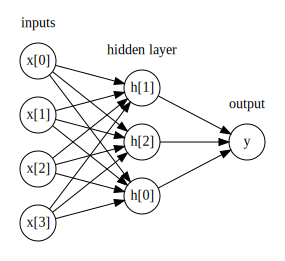

In [5]:
display(mglearn.plots.plot_single_hidden_layer_graph())

- the models has a lot more coefficients (called weights) to learn
- computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this more powerful than a linear model we apply a nonlinear function to the result:
1. rectifying nonlinearity or rectified linear unit (RELU)
2. tangens hyperbolicus (tanh)

The result of this function is then used in the weighted sum that computes the output $ŷ$

Text(0, 0.5, 'relu(x), tanh(x)')

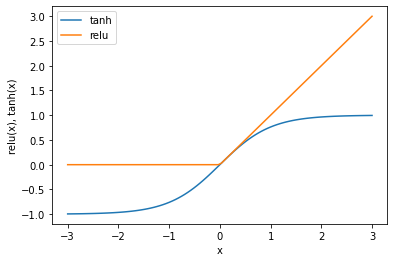

In [7]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

- relu cuts off values below zero
- tanh saturates to -1 for low input values and +1 for high input values
- Either function allows the neural network to learn much more complicated functions than a linear model

For a small neural network, the full formula for computing $ŷ$ in the case of regression (using the nonlinear function of tanh) would be:
- $h[0] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $h[1] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $h[2] = tanh(w[0, 0] * x[0] + w[1, 0] * x[1] + w[2, 0] * x[2] + w[3, 0] * x[3])$
- $ŷ = v[0] * h[0] + v[1] * h[1] + v[2] * h[2]$

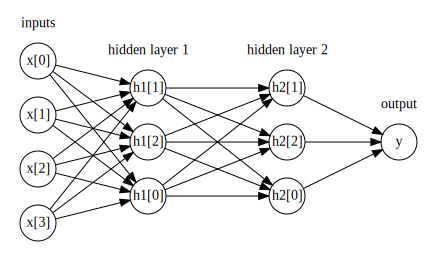

In [9]:
display(mglearn.plots.plot_two_hidden_layer_graph())

- adding many of these layers of computation is what inspired the term "deep learning"

## Tuning neural networks


Text(0, 0.5, 'Feature 1')

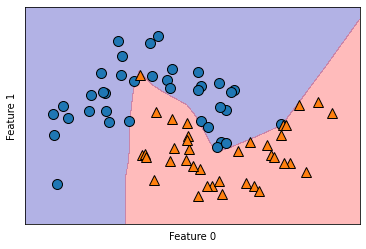

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/home/friend/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Text(0, 0.5, 'Feature 1')

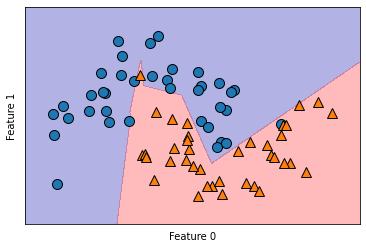

In [21]:
# reducing the number of hidden nodes reduces the complexity of the model.
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- The default nonlinearity is relu.
- with only 10 hidden units, the decision bounday looks ragged.
- with a single layer, this means the decision function will be made up of 10 straight line segments. 
- adding more hidden units, a second hidden layer, or use tanh nonlinearity for a smoother decision boundary

Text(0, 0.5, 'Feature 1')

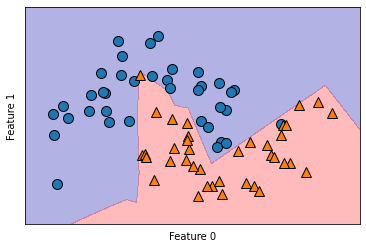

In [23]:
mlp = MLPClassifier(solver='lbfgs', random_state=0,
    hidden_layer_sizes=[10,10]
)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


Text(0, 0.5, 'Feature 1')

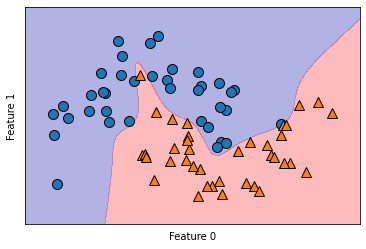

In [32]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
    random_state=42, hidden_layer_sizes=[10,10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- we can control the complexity of a neural network using an $l2$ penalty, *alpha*, to shrink the weights toward zero, as done in ridge regression and linear classifiers
- by default the l2 penalty *alpha* is very low

/home/friend/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/friend/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


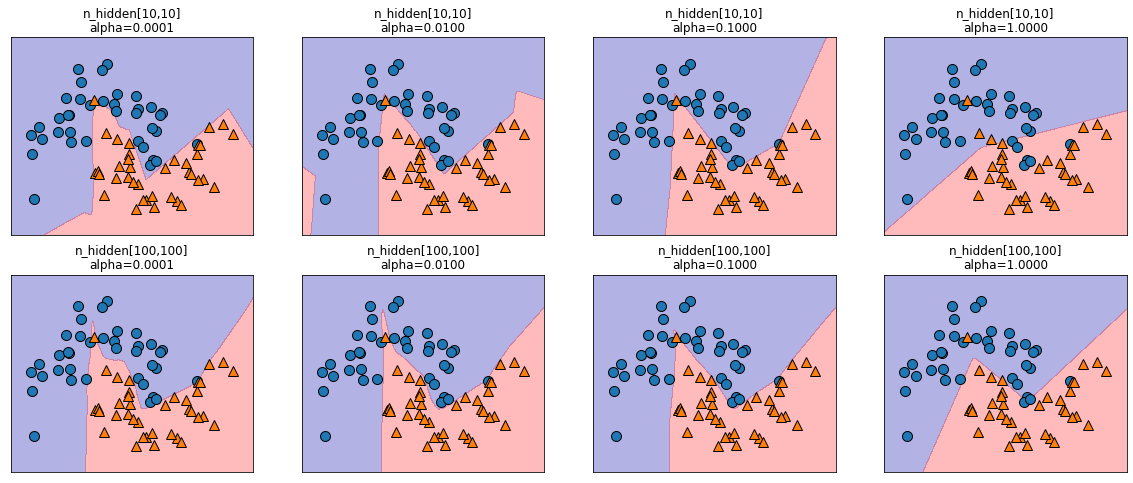

In [33]:
fig, axes = plt.subplots(2,4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10,100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden[{},{}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha
        ))

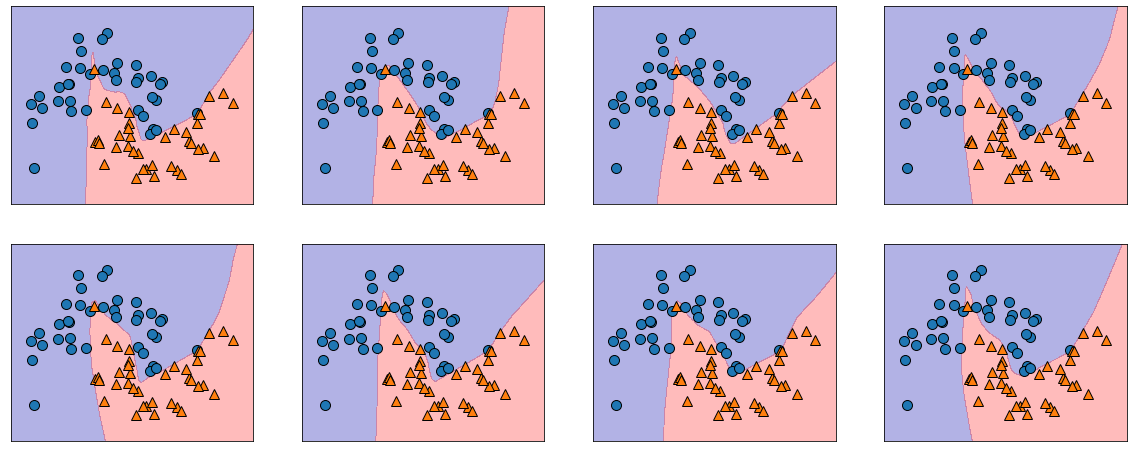

In [34]:
fig, axes = plt.subplots(2,4, figsize=(20,8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
    hidden_layer_sizes=[100,100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=0.3, ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)

To get a better understanding using real-world data, we'll look at the Breast Cancer dataset.
starting with default parameters

In [36]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))


Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]
Accuracy on training set: 0.94
Accuracy on test set: 0.916


- quite good, but not as good as other models we've tried on this exact dataset. May be due to scaling of the data
- Neural Networks expect all input features to vary in a similar way, and ideally have a mean of 0 and a variace of 1.

In [37]:
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)

X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)
))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))


Accuracy on training set: 0.991
Accuracy on test set: 0.965


/home/friend/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)
))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [40]:
# to close the gap between training and test (suspected of overfitting) we increase the alpha parameter to add stronger regularization of the weights
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)
))
print("Accuracy on test  set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test  set: 0.972


We can analyze what a neural network has learned, but it is difficult. One way to introspect what was learned is to look at the weights.

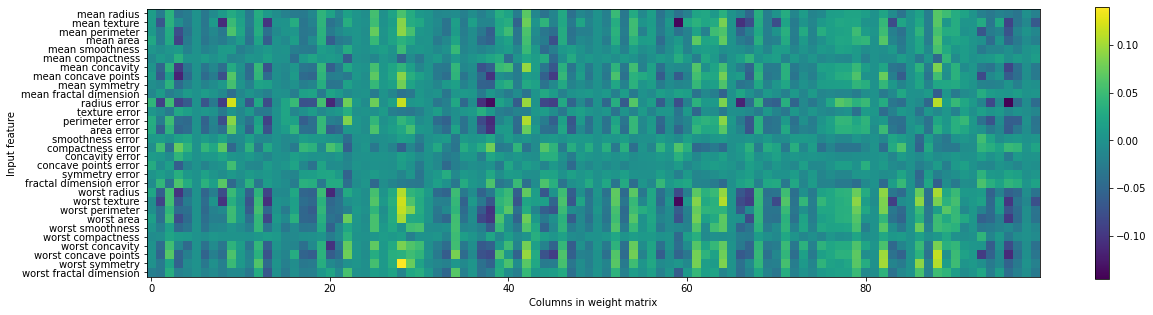

In [42]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

## Strengths, weaknesses, and parameters
strengths
- able to build incredibly complex models and capture information contained in large amounts of data well
- given enough computation time, data, and careful tuning of the parameters, neural networks often beat other machine learning algorithms (for classification and regression tasks)

weaknesses
- often take a long time to train
- require careful preprocessing of the data
- may not always be best option for data that has different kinds of features

parameters
- max_iter
- alpha
- hidden_layer_sizes
- solver:  
    1. adam
    2. lbfgs
    3. sgd

Common way to adjust parameters in a neural network is to first create a network that is large enough to overfit, making sure the task can be learned by the network.
Then, either shrink the network or increase *alpha* to add regularization whil will improve generalization performance.